# <b> <center> Seaborn

### Why Seaborn?

- provides a layer of abstraction hence simpler to use
- better aesthetics
- more graphs included
- Seaborn got popular hence it is used by many company's 

### Seaborn Roadmap

Types of Functions

- Figure Level
- Axis Level

Main Classification

- Relational Plot
- Distribution Plot
- Categorical Plot
- Regression Plot
- Matrix Plot
- Multiplots

https://seaborn.pydata.org/api.html

# <center> <b> 1. Relational Plot </center></b>

- to see the statistical relation between 2 or more variables.
- Bivariate Analysis

Plots under this section

- scatterplot
- lineplot

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pxw

In [2]:
# Importing a dataset form season
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## <center> <b> <i> i) Scatter Plot </center> </b> </i>

<Axes: xlabel='total_bill', ylabel='tip'>

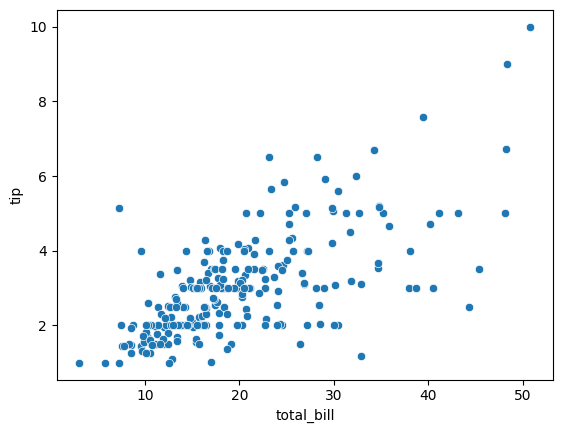

In [4]:
# Scatter plot -> axes level function -> are in rectangle shape by default

sns.scatterplot(tips, x='total_bill', y='tip') # if we plot the same graph in the matplotlib then we have to tell which the axis names as seaborn does this for default

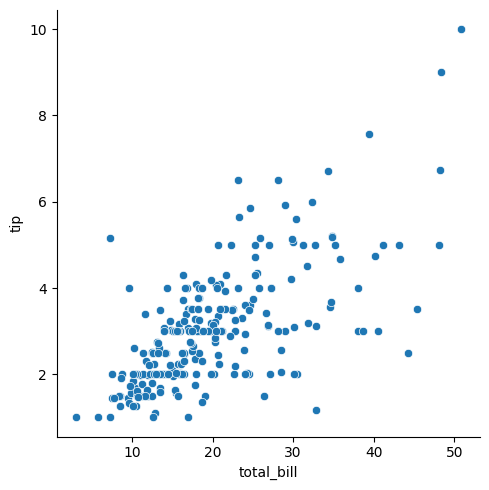

In [5]:
# Scatter plot using -> figure  level function -> are in square shape by default-> are in square shape by default
sns.relplot(tips, x='total_bill', y='tip', kind= 'scatter')

<span style="font-size: 18px;">In Seaborn, the choice between using figure-level functions and axes-level functions depends on the specific requirements of the plot.  

Figure-level functions (e.g., relplot(), catplot(), lmplot(), displot()) are generally recommended for most applications due to their ability to create structured multi-plot grids and handle faceting variables automatically. They offer a higher-level interface that simplifies the process of generating complex visualizations with consistent layouts. These functions manage the creation of the Matplotlib figure and axes internally.  

Axes-level functions (e.g., scatterplot(), boxplot(), histplot(), kdeplot()) are designed to draw directly onto a single Matplotlib Axes object. They provide more granular control over the plot and are suitable when:  

Creating complex figures with multiple, different plot types: When you need a highly customized layout with various plot kinds on a single figure, it is often more effective to set up the Matplotlib figure and axes explicitly and then use axes-level functions to populate each subplot.  

Integrating with existing Matplotlib figures: If you are working within an existing Matplotlib object-oriented script and want to add Seaborn plots to pre-defined axes, axes-level functions are the appropriate choice.  

In summary:  

For most standard plotting tasks and when using faceting, figure-level functions are recommended: for their convenience and ability to produce clean, well-structured plots.  

For highly customized multi-plot figures or when working within an existing Matplotlib framework, axes-level functions provide the necessary flexibility and control

> For convince it is recommended to use figure level functions to plots graphs in seaborn<br>
> For customization, and flexibility use axes level functions to plots graphs in seaborn

<span style="font-size: 18px;"> <b>Question: Show the male and female as different color in graph

<Axes: xlabel='total_bill', ylabel='tip'>

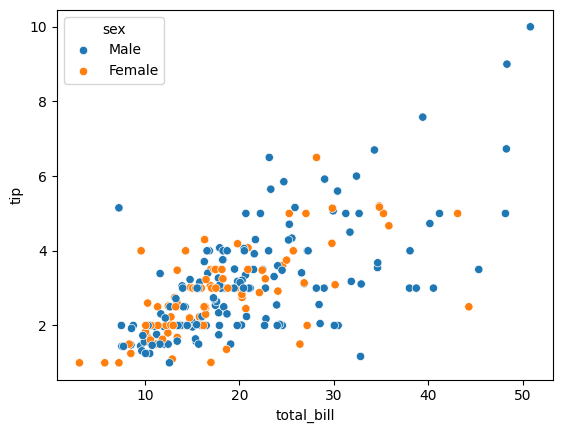

In [6]:
# hidden parameters of seaborn which give seaborn power over matplotlib
sns.scatterplot(tips, x='total_bill', y='tip', hue = 'sex')

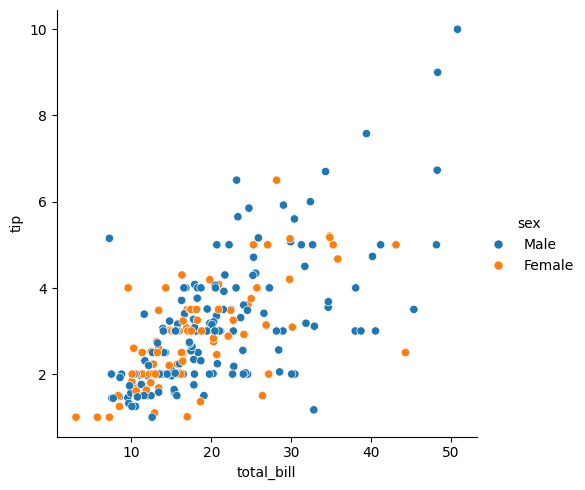

In [7]:
sns.relplot(tips, x='total_bill', y='tip', kind= 'scatter', hue = 'sex')

<span style="font-size: 18px;"> <b>Question: Add the information in the graph which customer come during the dinner time and which come during the lunch time.

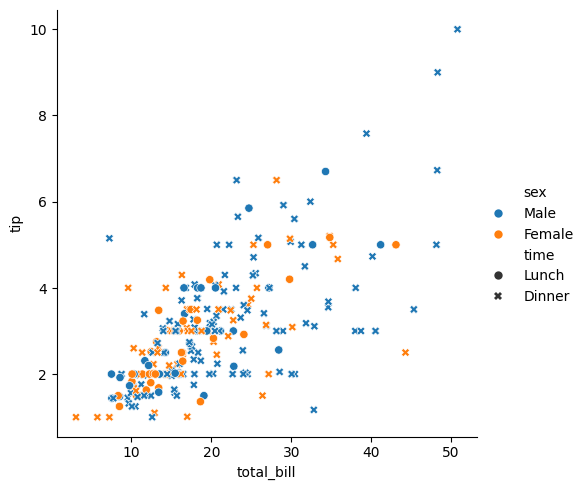

In [8]:
sns.relplot(tips, x='total_bill', y='tip', kind= 'scatter', hue = 'sex', style='time') # can do the same thing using the axes function

<span style="font-size: 18px;"> <b>Question: Add the size information of the customer in the graph

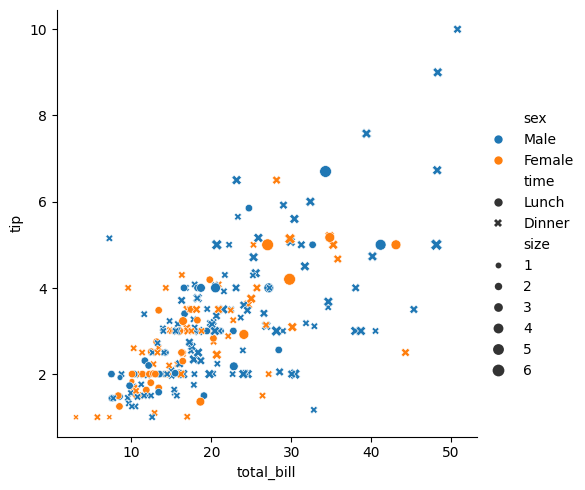

In [9]:
sns.relplot(tips, x='total_bill', y='tip', kind= 'scatter', hue = 'sex', style='time', size='size')

## <center> <b> <i> ii) Line Plot </center> </b> </i>

> If your dataset include time then you can use line plot as they are better in showing continuity 

In [10]:
gap = px.data.gapminder() # this dataset contain different countries data in yearly order

NameError: name 'px' is not defined

In [ ]:
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


<span style="font-size: 18px;"> <b>Question: Now plot India life exp from 1952 to 2007

In [ ]:
India_gap = gap[gap['country'] == 'India']

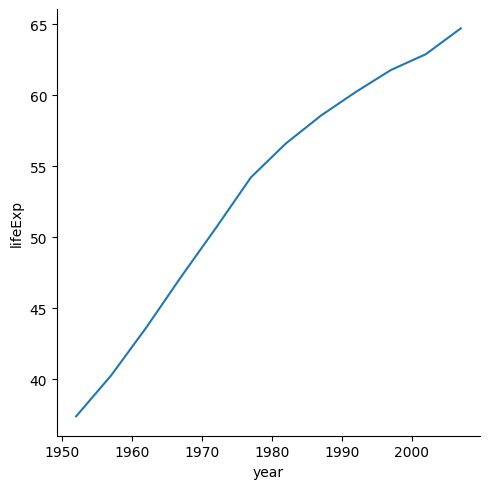

In [ ]:
sns.relplot(India_gap, x='year', y='lifeExp', kind='line', markers=True)

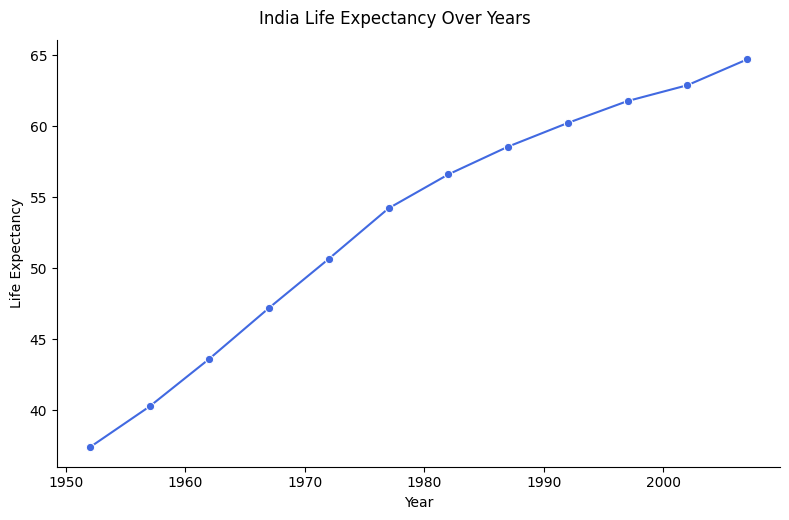

In [ ]:
# improving the default plot
g = sns.relplot(
    data=India_gap,
    x='year',
    y='lifeExp',
    kind='line',
    markers = True,
    marker = 'o', 
    dashes=False,
    height=5,
    aspect=1.6,
    color="royalblue"
)

g.fig.suptitle("India Life Expectancy Over Years", y=1.03)
g.set_axis_labels("Year", "Life Expectancy")

<Axes: xlabel='year', ylabel='lifeExp'>

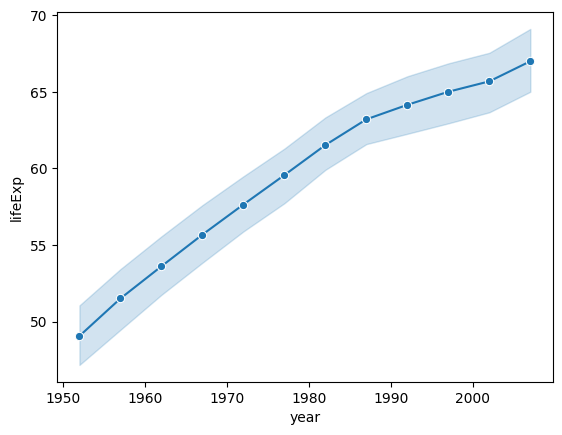

In [ ]:
# axes level function

sns.lineplot(gap, x='year', y='lifeExp', markers=True, marker='o')

In [ ]:
# hue -> style

south_asia = gap[gap['country'].isin(['India','China', 'Pakistan'])]

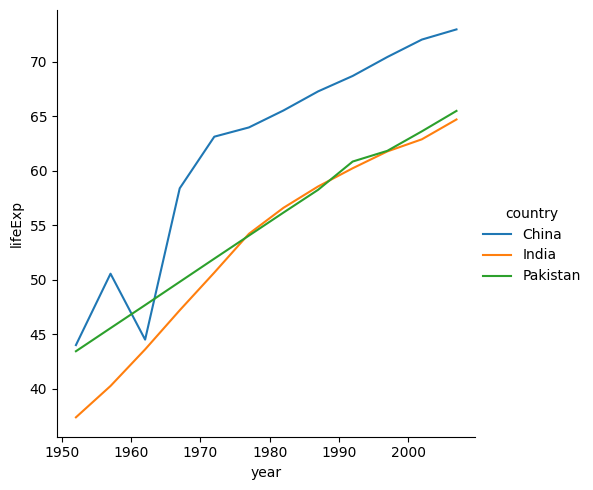

In [ ]:
sns.relplot(south_asia, x='year', y='lifeExp', kind='line', hue='country', markers=True,)

<Axes: xlabel='year', ylabel='lifeExp'>

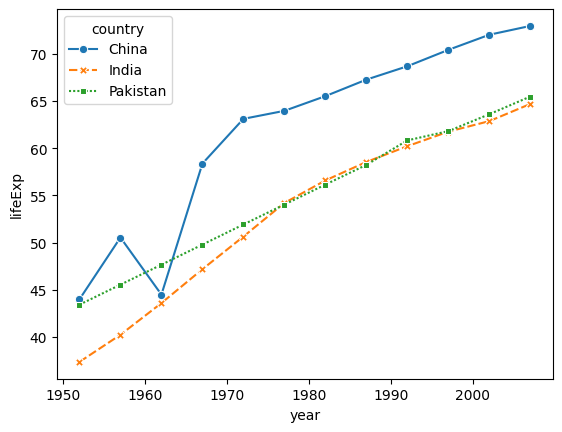

In [ ]:
# plot using  the axes function
sns.lineplot(south_asia, x='year', y='lifeExp', hue='country', markers=True, style='country')

> As the relplot is a figure level function, you see the hue is inside the plot.<br>
> But the lineplot is a axes level function, so you can see the hue inside the plot, because the axes level function give control in the axes level. 

<span style="font-size: 18px;"> <b>Question: Add information in the graph for showing continent of the counties<Br>
Answer: Use style parameter

In [ ]:
temp_df = gap[gap['country'].isin(['India','Brazil', 'Germany'])]

temp_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
168,Brazil,Americas,1952,50.917,56602560,2108.944355,BRA,76
169,Brazil,Americas,1957,53.285,65551171,2487.365989,BRA,76
170,Brazil,Americas,1962,55.665,76039390,3336.585802,BRA,76
171,Brazil,Americas,1967,57.632,88049823,3429.864357,BRA,76
172,Brazil,Americas,1972,59.504,100840058,4985.711467,BRA,76


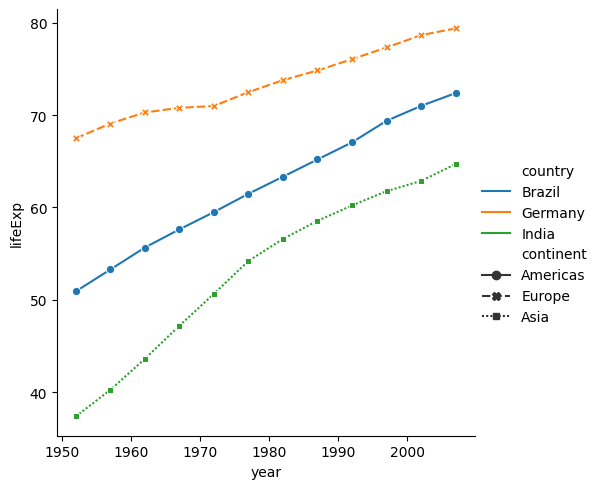

In [ ]:
sns.relplot(temp_df, x='year', y='lifeExp', kind='line', hue='country', markers=True, style='continent')

<span style="font-size: 18px;"> <b>Question: Add the size information of the continent in the graph

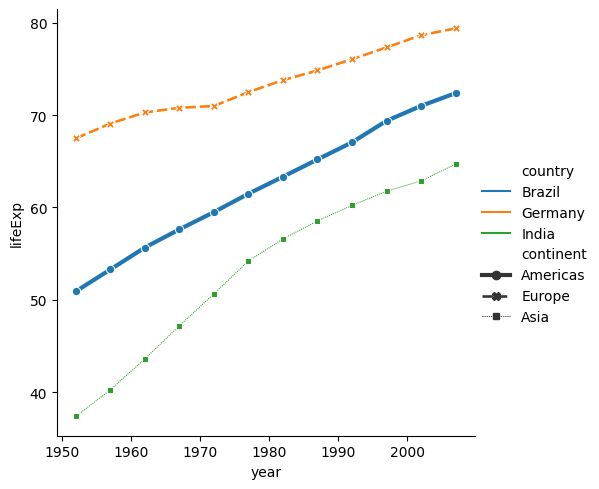

In [ ]:
sns.relplot(temp_df, x='year', y='lifeExp', kind='line', hue='country', markers=True, style='continent', size='continent')

## <center> <b> <i> iii) Facet Plot </center> </b> </i>

> Facet plot will only work with figure level function not with the axes level function <br>
> Works with the relplot not with the scatterplot and lineplot

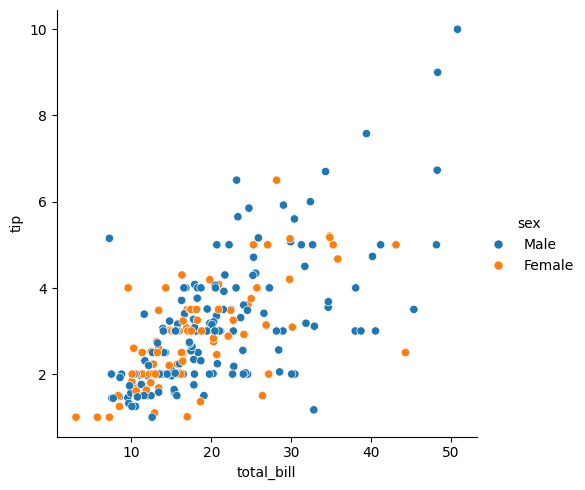

In [ ]:
sns.relplot(tips, x='total_bill', y='tip', kind='scatter', hue='sex')

<span style="font-size: 18px;"> <b>Question: Your manager says the plot is not good make two separate plots for male and female.

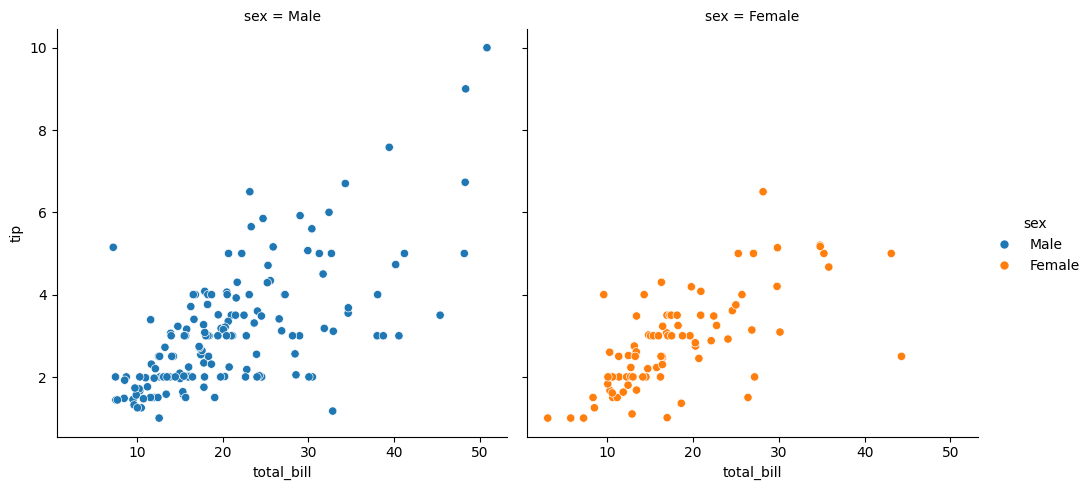

In [ ]:
sns.relplot(tips, x='total_bill', y='tip', kind='scatter', hue='sex', col='sex')

<span style="font-size: 18px;"> <b>Question: Your manager says the plot is good but now he want the plot in row wise.

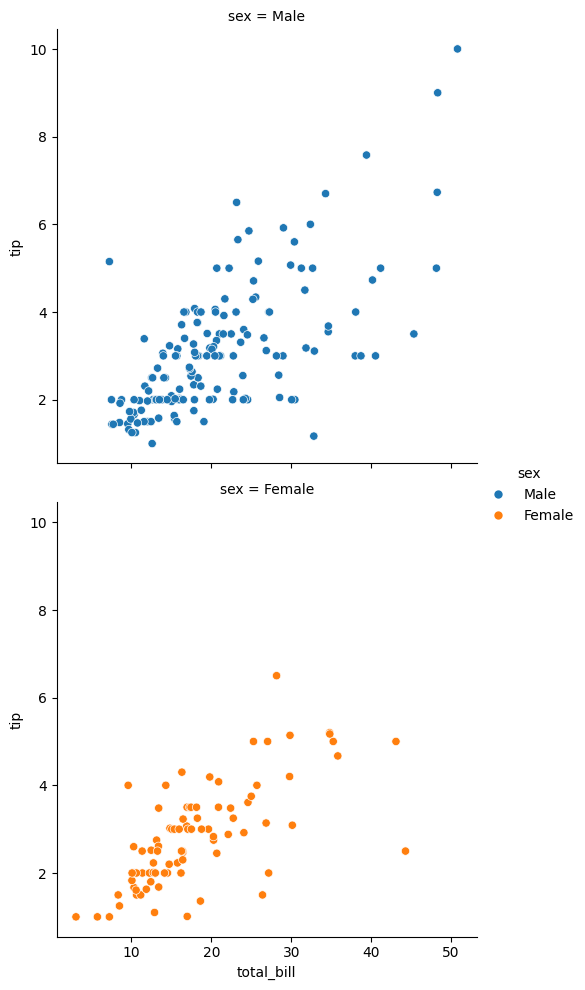

In [ ]:
sns.relplot(tips, x='total_bill', y='tip', kind='scatter', hue='sex', row='sex')

<span style="font-size: 18px;"> <b>Question: Now the fucking asshole manger want smoker information in the graph.

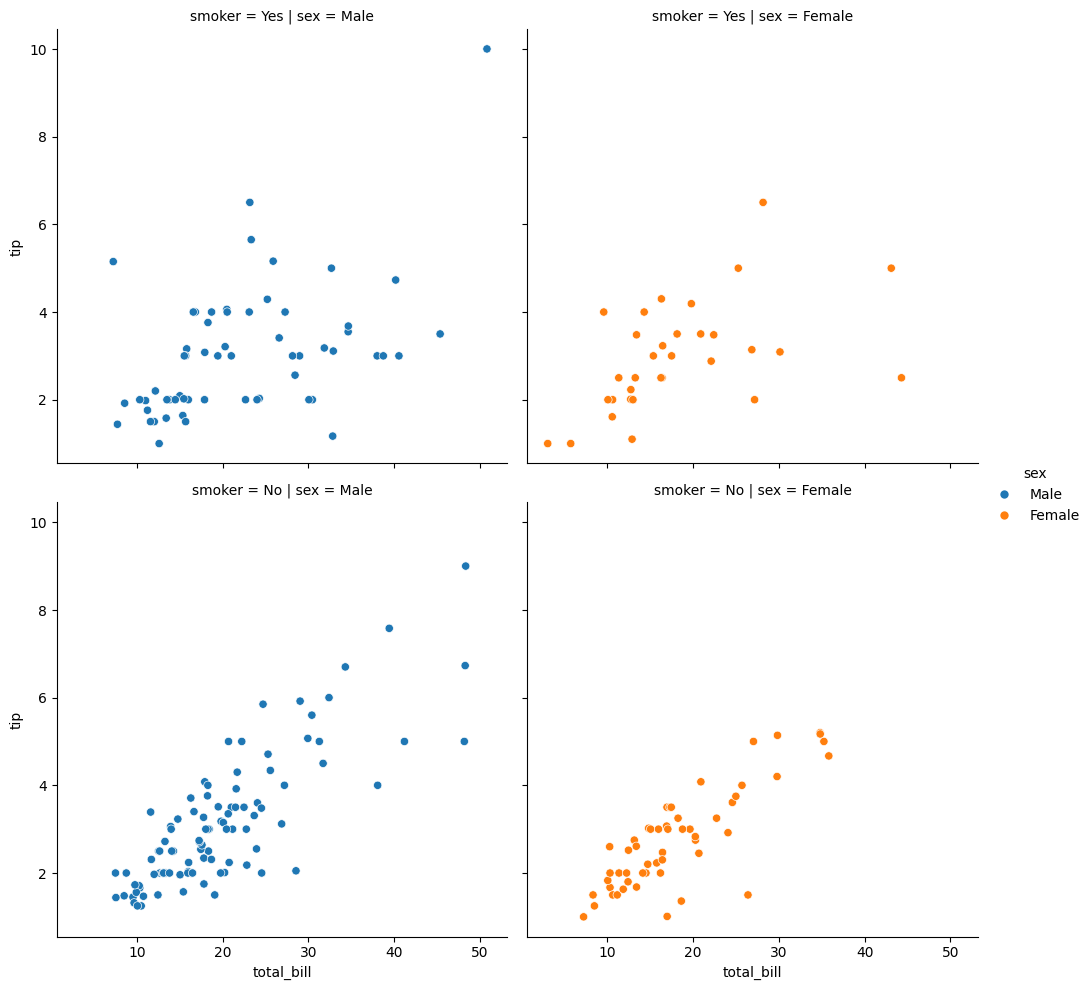

In [ ]:
sns.relplot(tips, x='total_bill', y='tip', kind='scatter', hue='sex', row='smoker', col='sex')

<span style="font-size: 18px;"> <b>Question: Now the plot the graph in the day and sex columns basis in the form of matrix.

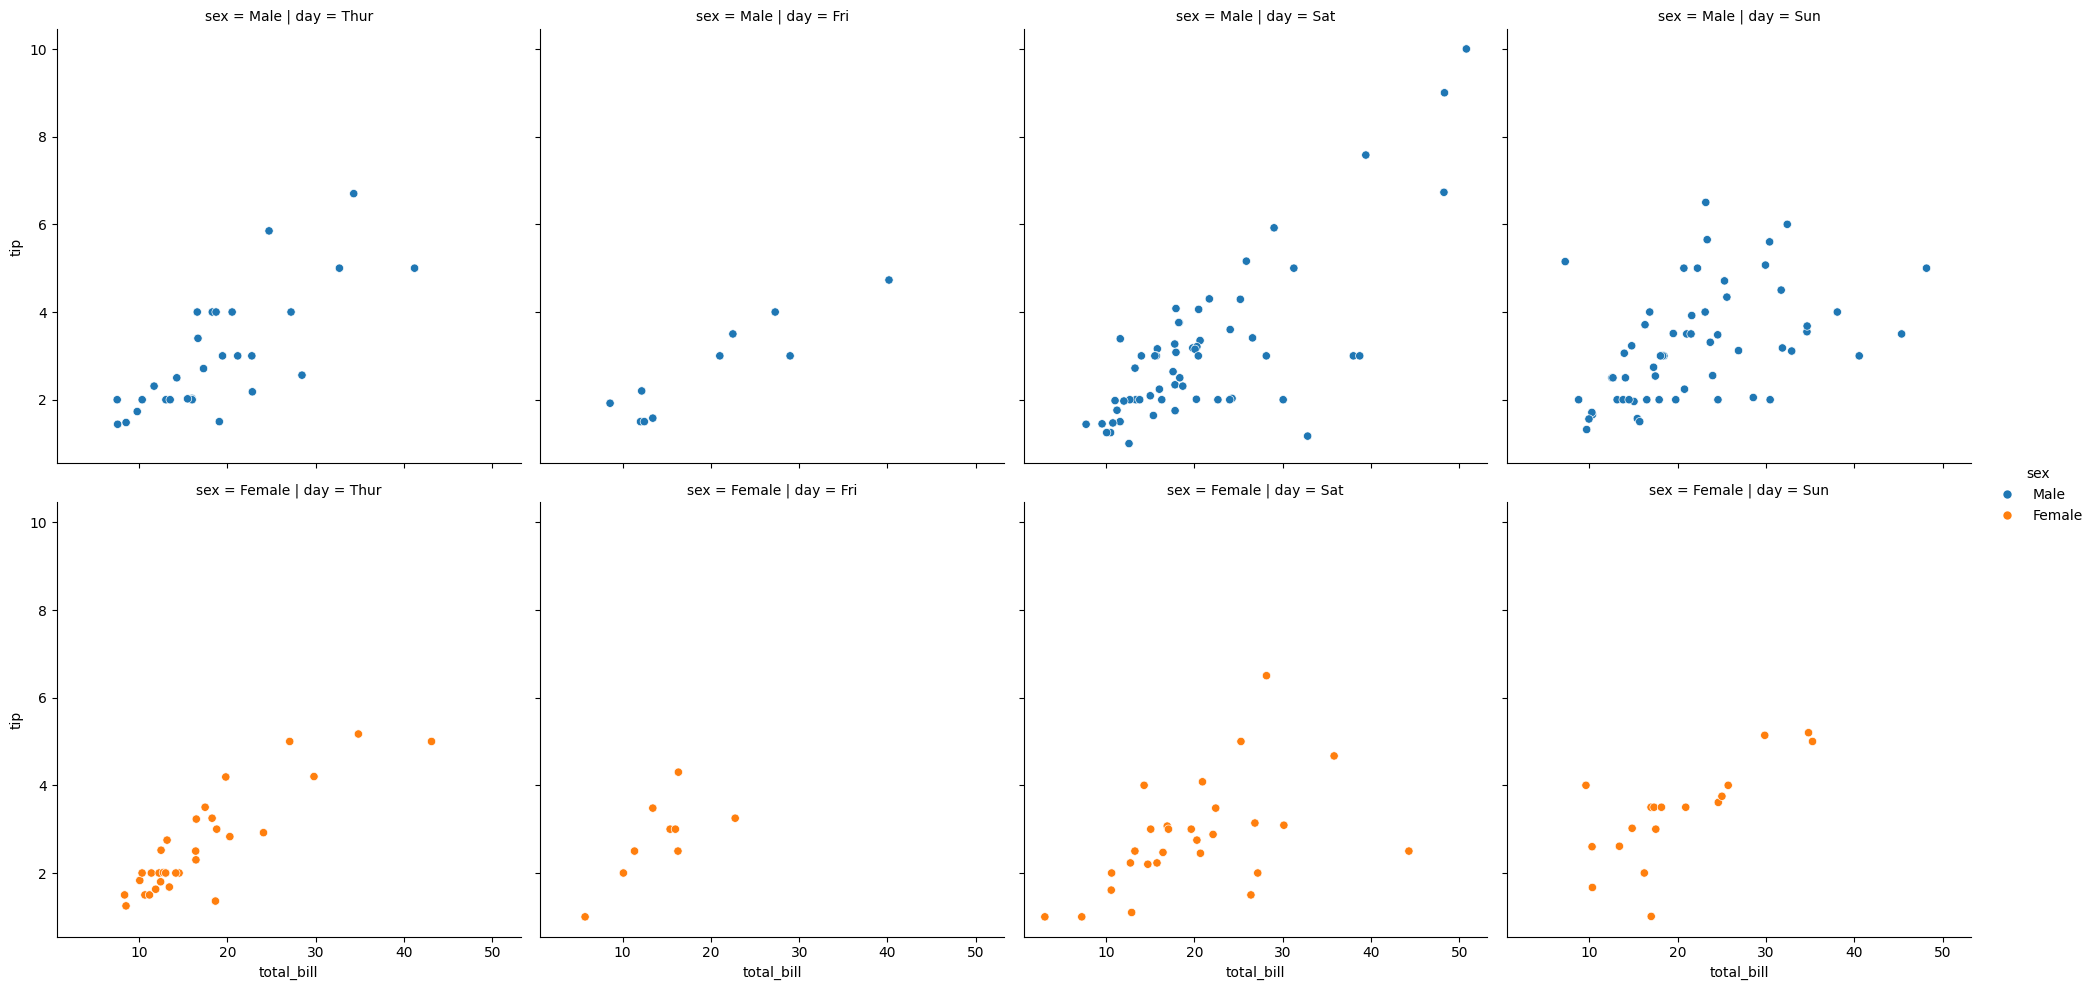

In [ ]:
sns.relplot(tips, x='total_bill', y='tip', kind='scatter', hue='sex', row='sex', col='day')

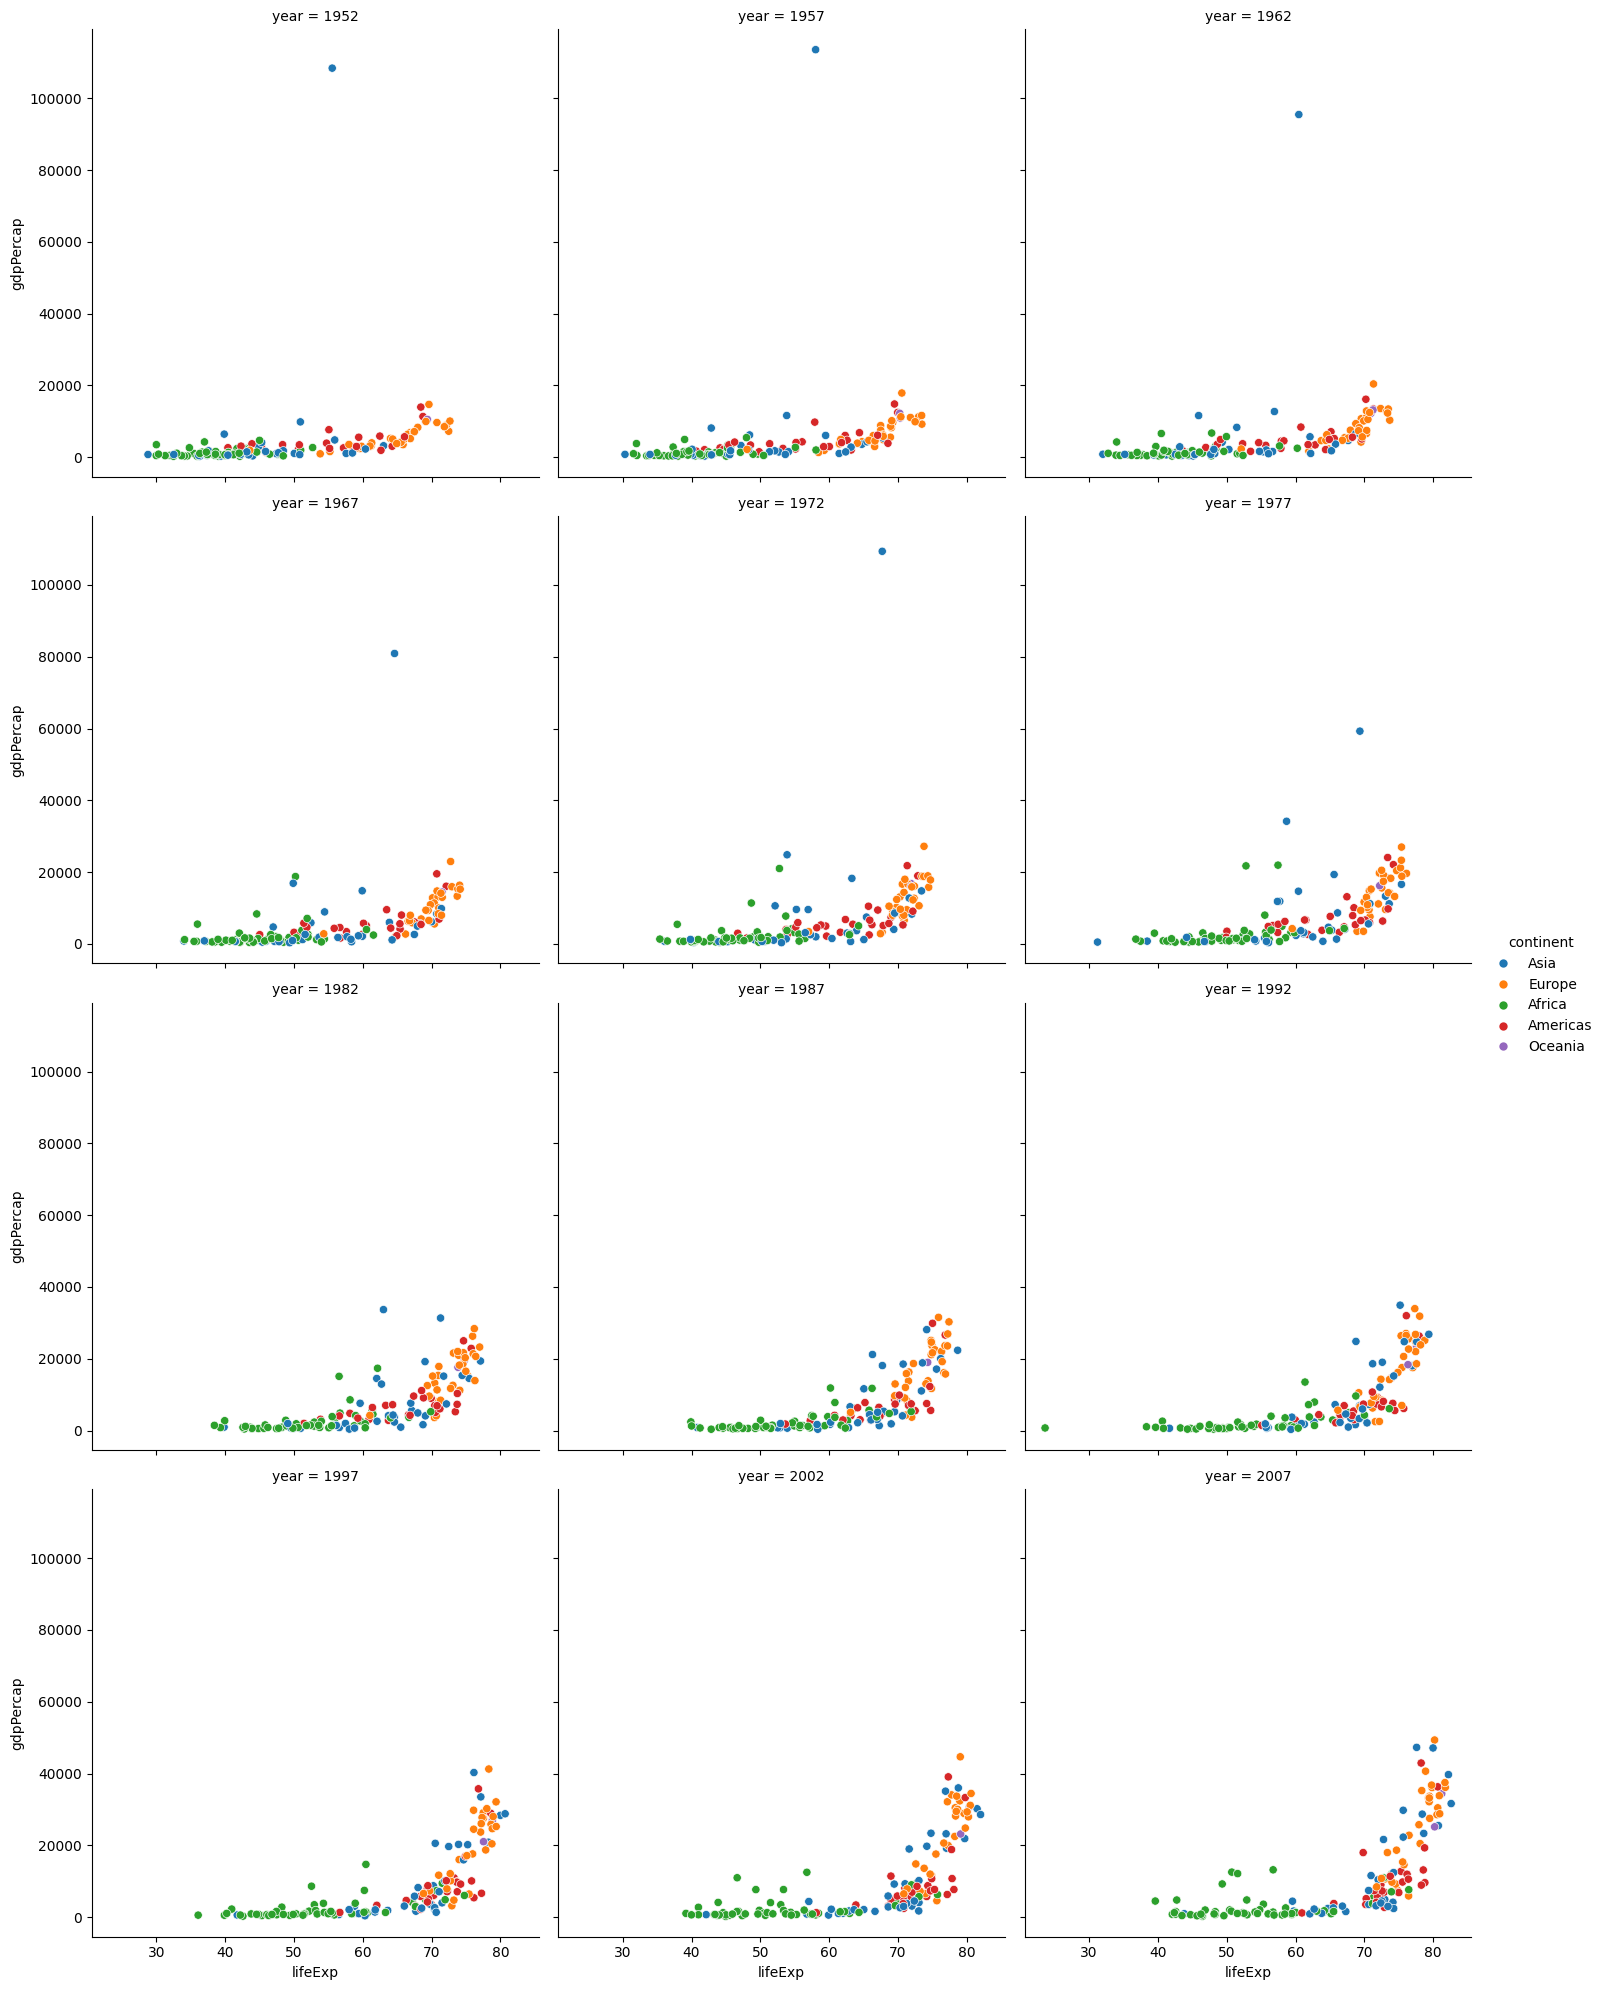

In [ ]:
# col wrap

sns.relplot(gap, x='lifeExp', y='gdpPercap', kind='scatter', col='year', col_wrap=3, hue='continent')

# <center> <b> 2. Distribution Plots </center></b>
- used for univariate analysis
- used to find out the distribution
- Range of the observation
- Central Tendency
- is the data bimodal?
- Are there outliers?

Plots under distribution plot

- histplot
- kdeplot
- rugplot

## <center> <b> i) Histogram Plot </center></b>

In [ ]:
# figure level function -> distplot
# axes level function -> histplot, kdeplot, rugplot

<span style="font-size: 18px;"> <b>Question: Plot a histogram on the tips dataset for showing the total_bill

<Axes: xlabel='total_bill', ylabel='Count'>

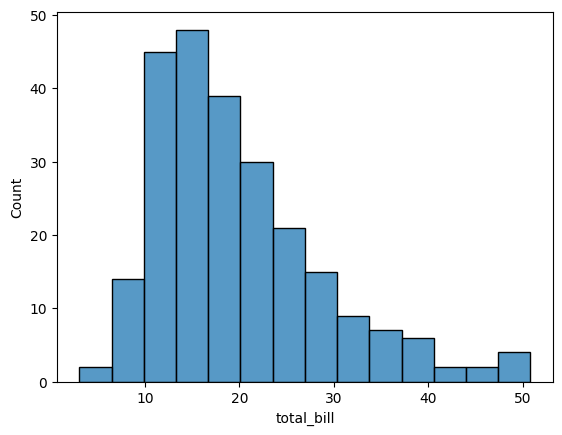

In [ ]:
sns.histplot(tips, x='total_bill')

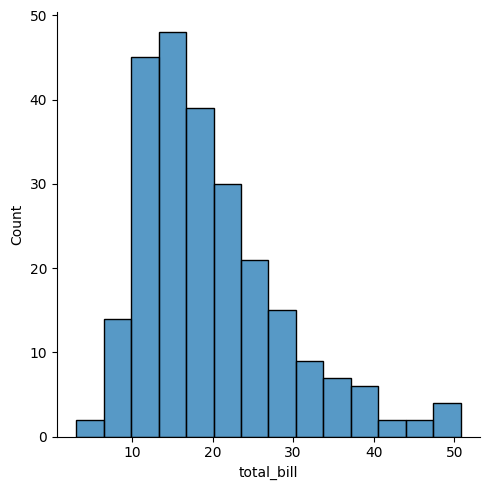

In [ ]:
# Histogram using the figure function
sns.displot(tips, x='total_bill', kind='hist')

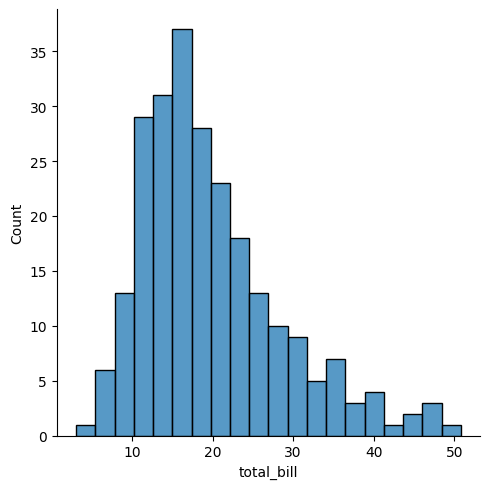

In [ ]:
# bins parameters in histogram
sns.displot(tips, x='total_bill', kind='hist', bins=20)

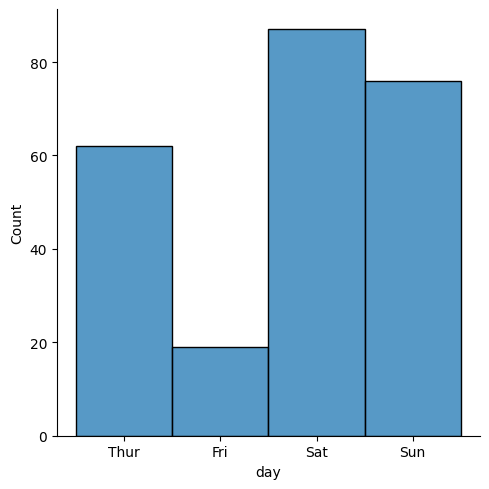

In [ ]:
# It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram. 
# Discrete bins are automatically set for categorical variables

sns.displot(tips, x='day', kind='hist') # this is technically a countplot

<span style="font-size: 18px;"> <b>Question: Plot a histogram to show the number of female and male who give tips

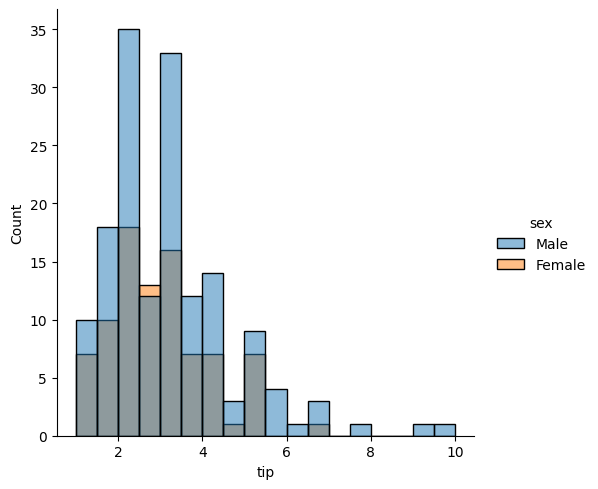

In [ ]:
sns.displot(tips, x='tip', hue='sex', kind='hist')

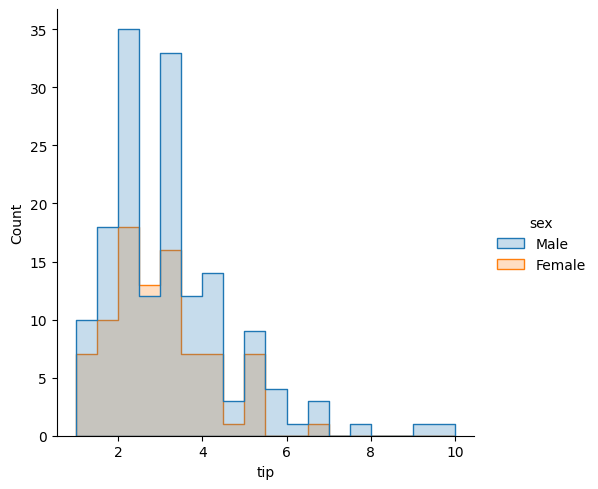

In [ ]:
# element -> step
sns.displot(tips, x='tip', hue='sex', kind='hist', element='step')

<span style="font-size: 18px;"> <b>Question: Plot the histogram on the age column of the titanic dataset

In [ ]:
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


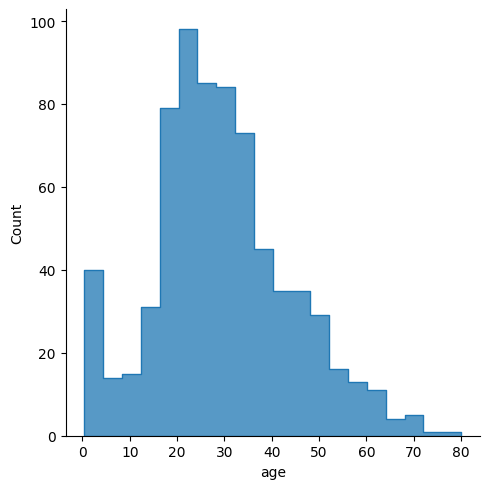

In [ ]:
sns.displot(titanic, x='age', kind='hist', element='step')

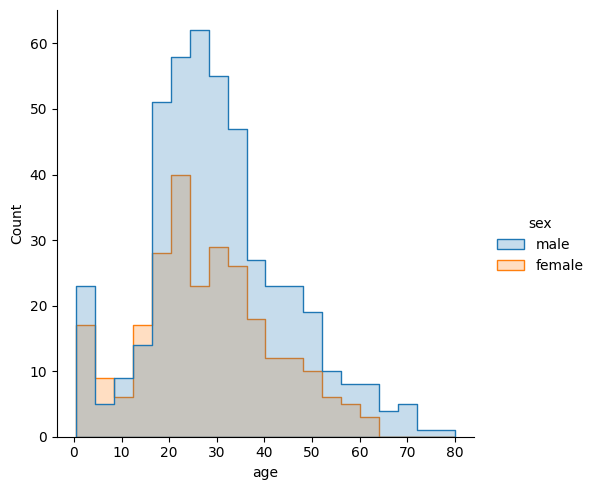

In [ ]:
# above graph with the hue parameter
sns.displot(titanic, x='age',hue='sex', kind='hist', element='step')

<span style="font-size: 18px;"> <b>Question: Plot the histogram using the facet plot

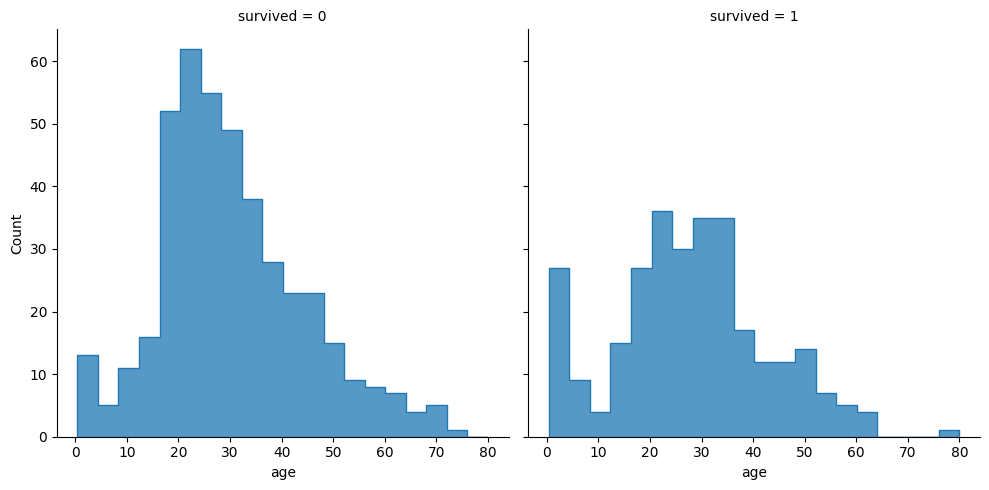

In [ ]:
# faceting using row and col -> does not work with the histplot function
sns.displot(titanic, x='age',kind='hist', element='step', col='survived')

## <center> <b> ii) kde plot</center></b>
- full form of kde is kernel density estimation
- Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate


> kde plot is use more than histogram plot because it kindly predict/shows the missing values of the data which the histogram doesn't

<Axes: xlabel='total_bill', ylabel='Density'>

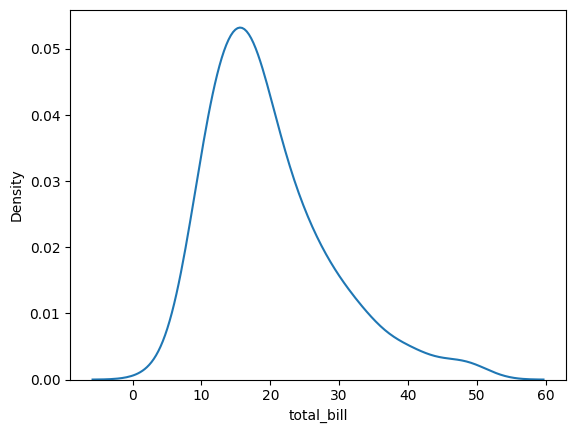

In [ ]:
sns.kdeplot(tips, x='total_bill') # axes level function

# this plot give the approx probability of value coming up for eg in the below plot for 20 there is  about 5% probability (beginner level definition not accurate)

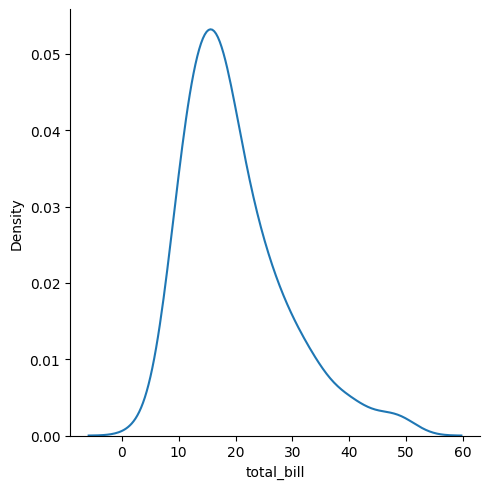

In [ ]:
sns.displot(tips, x='total_bill', kind='kde') # figure level function

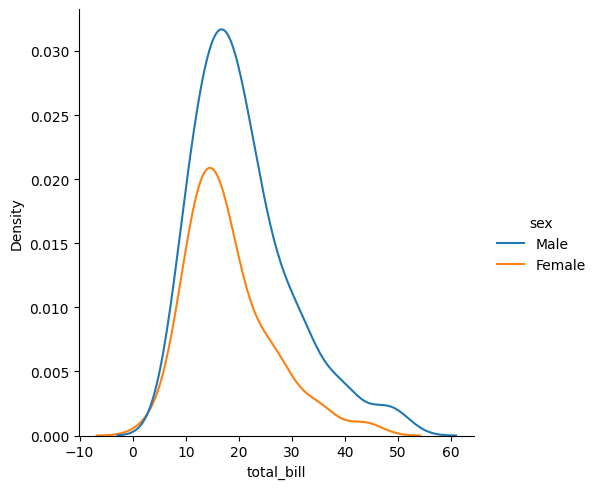

In [ ]:
# hue -> fill

sns.displot(tips, x='total_bill', hue='sex', kind='kde')

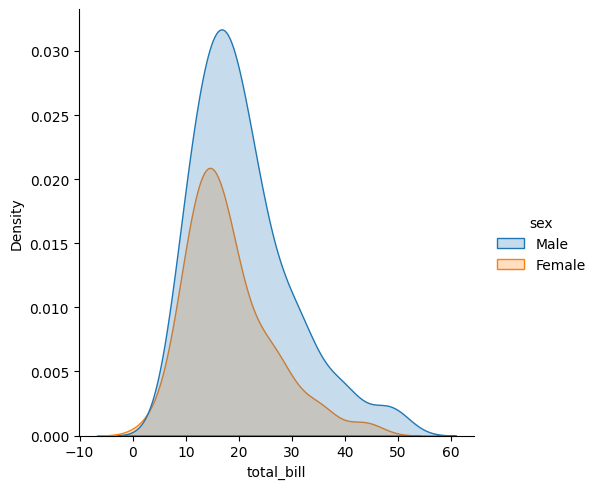

In [ ]:
sns.displot(tips, x='total_bill', hue='sex', fill=True, kind='kde')

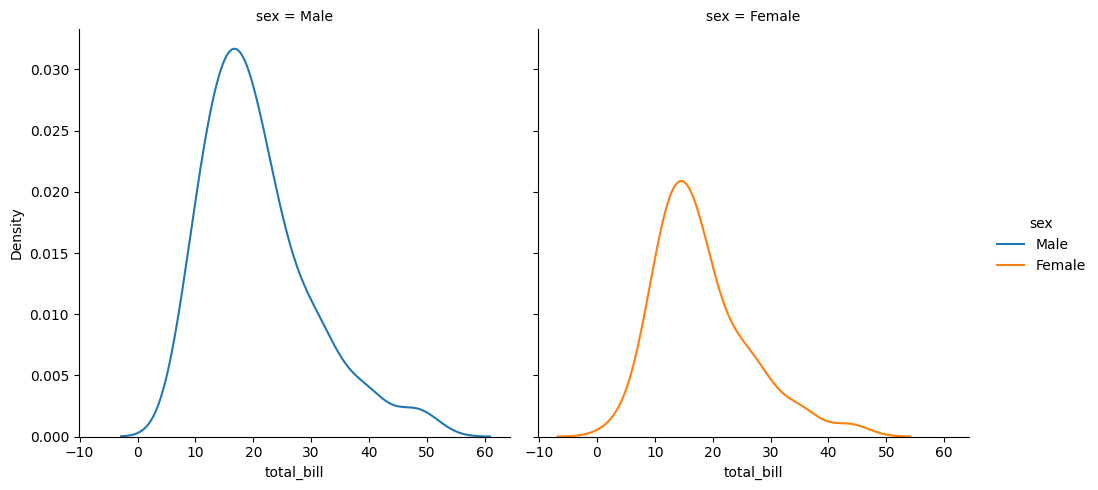

In [ ]:
sns.displot(tips, x='total_bill', hue='sex', kind='kde', col='sex')

## <center> <b> iii) Rug plot </center></b>
- Plot marginal distributions by drawing ticks along the x and y axes.  
- This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way.

<Axes: xlabel='total_bill', ylabel='Density'>

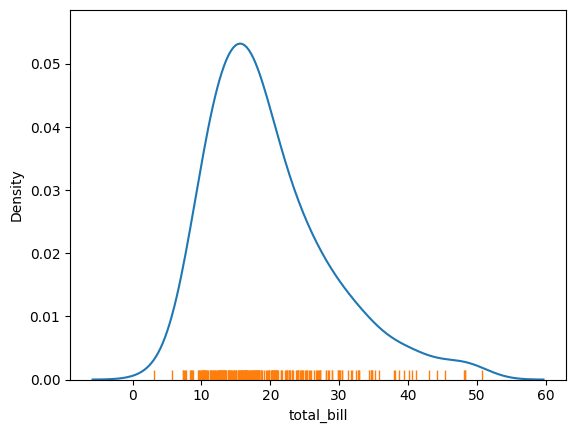

In [ ]:
sns.kdeplot(tips, x='total_bill')
sns.rugplot(tips, x='total_bill')

## <center> <b> Bivariate histogram </center></b>
- A bivariate histogram bins the data within rectangles that tile the plot 
- and then shows the count of observations within each rectangle with the fill color

<Axes: xlabel='total_bill', ylabel='tip'>

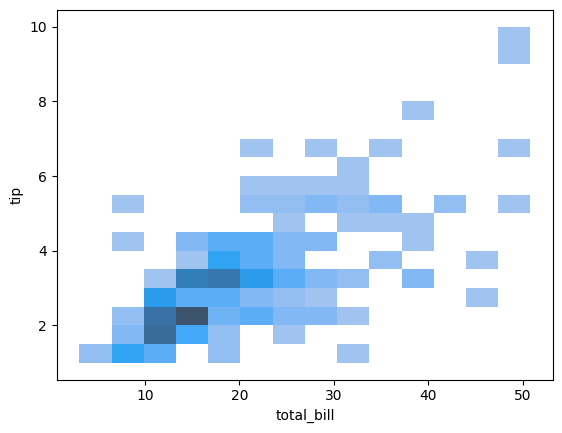

In [ ]:
sns.histplot(data=tips, x='total_bill', y='tip') # using the axes function

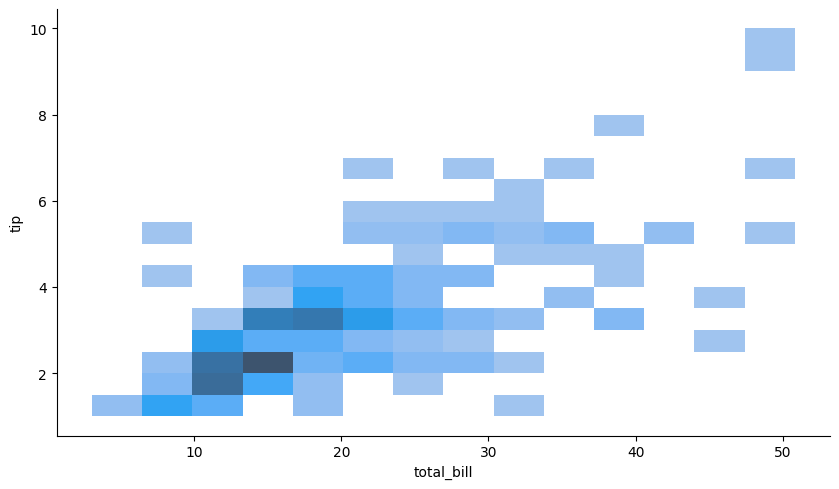

In [15]:
sns.displot(data=tips, x='total_bill', y='tip', kind= 'hist', height=5, aspect=1.7) # using the figure function

## <center> <b> Bivariate Kdeplot </center> </b>
- a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian

<Axes: xlabel='total_bill', ylabel='tip'>

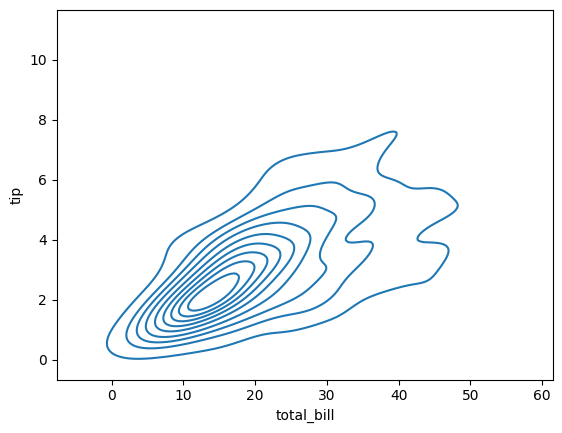

In [ ]:
sns.kdeplot(data=tips, x='total_bill', y='tip') # if the lines are closer to each other then there are more customer in that region otherwise vice versa 

<Axes: xlabel='total_bill', ylabel='tip'>

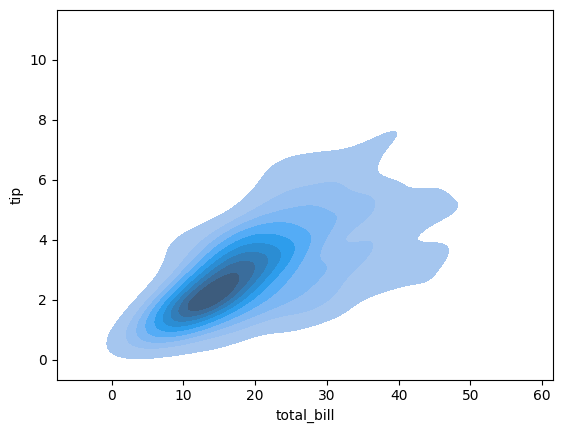

In [12]:
sns.kdeplot(data=tips, x='total_bill', y='tip', fill=True)

# <center> <b> 2. Matrix Plot </center> </b>
- Heatmap
- Clustermap

## <center> <b> i) Heatmap </center> </b>
- Plot rectangular data as a color-encoded matrix
- ***there is no figure level function for the heatmap***

<span style="font-size: 18px;"> <b>Question: Plot the heatmap with countries name on the y axes and year on the x axes for the  lifeExp<br>
Answer: As our data is in long format we have convert the dataset into the long format using pivot

In [ ]:
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [ ]:
gap_df = gap.pivot(index='country', columns='year', values='lifeExp')

gap_df.head()

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,28.801,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,42.129,43.828
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320


> We can edit the axes level same way as we edit the matplotlib 

<Axes: xlabel='year', ylabel='country'>

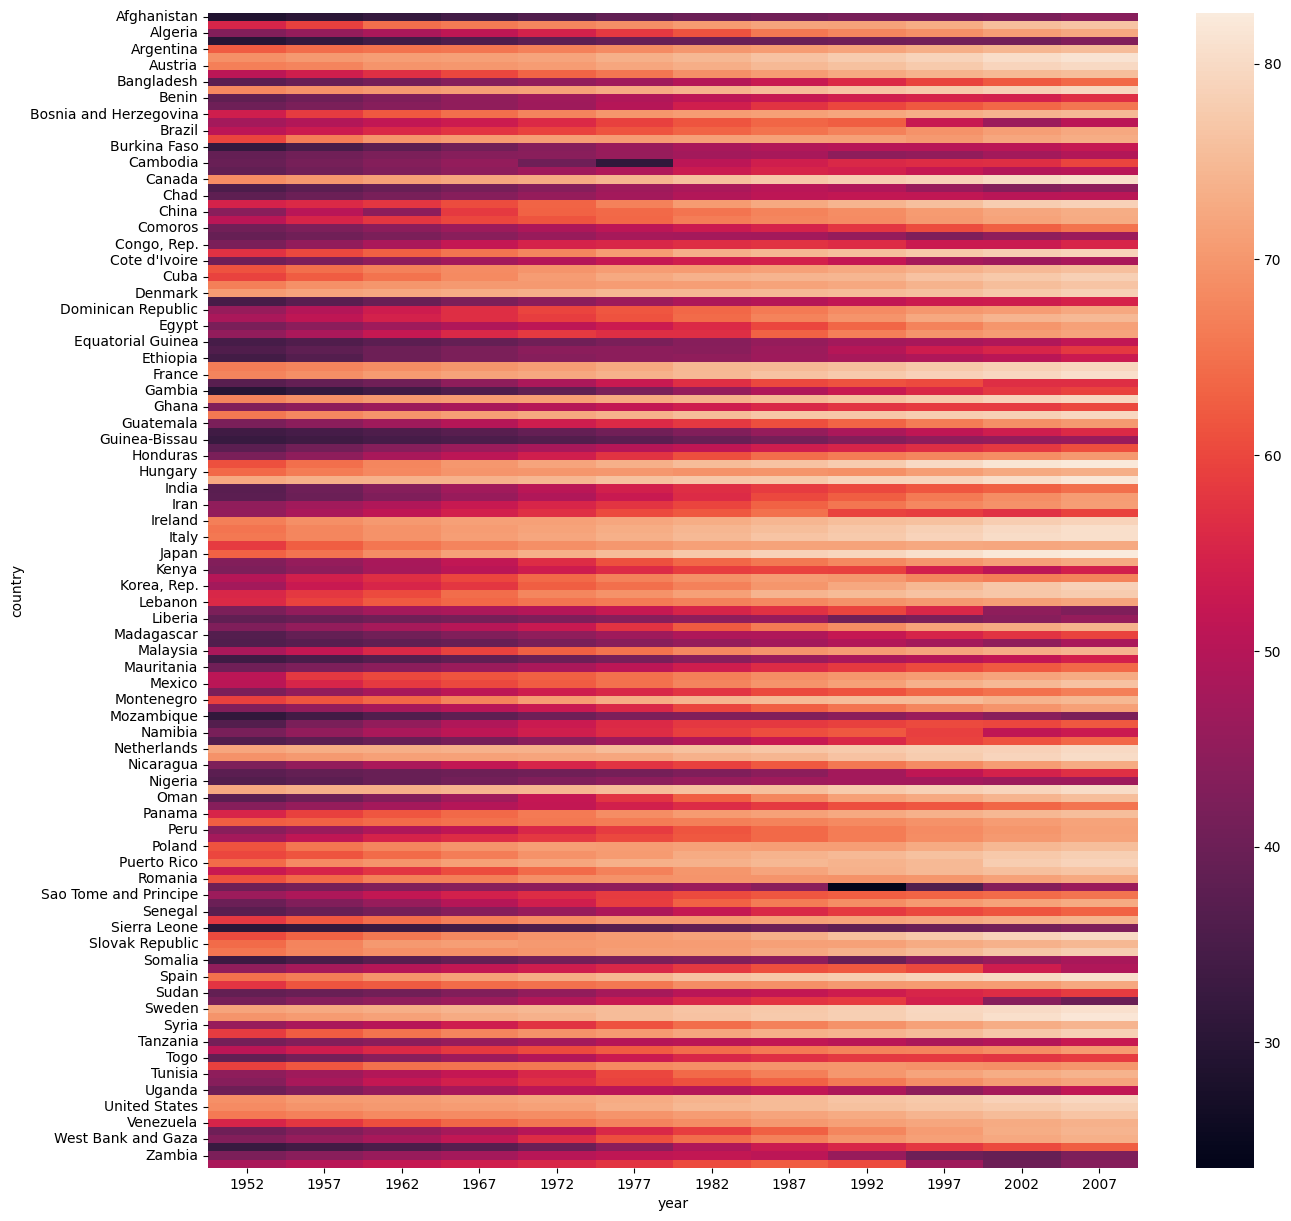

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(gap_df) # axes level function 

<span style="font-size: 18px;"> <b>Question: Plot the heatmap of Life Expectancy for European country and also show the number in the heatmap

In [ ]:
# annot

Europe_df = gap[gap['continent'] == 'Europe'].pivot(index='country', columns='year', values='lifeExp')

Europe_df.head()

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Albania,55.23,59.28,64.82,66.22,67.69,68.93,70.42,72.00,71.581,72.950,75.651,76.423
Austria,66.80,67.48,69.54,70.14,70.63,72.17,73.18,74.94,76.040,77.510,78.980,79.829
Belgium,68.00,69.24,70.25,70.94,71.44,72.80,73.93,75.35,76.460,77.530,78.320,79.441
Bosnia and Herzegovina,53.82,58.45,61.93,64.79,67.45,69.86,70.69,71.14,72.178,73.244,74.090,74.852
Bulgaria,59.60,66.61,69.51,70.42,70.90,70.81,71.08,71.34,71.190,70.320,72.140,73.005


<Axes: xlabel='year', ylabel='country'>

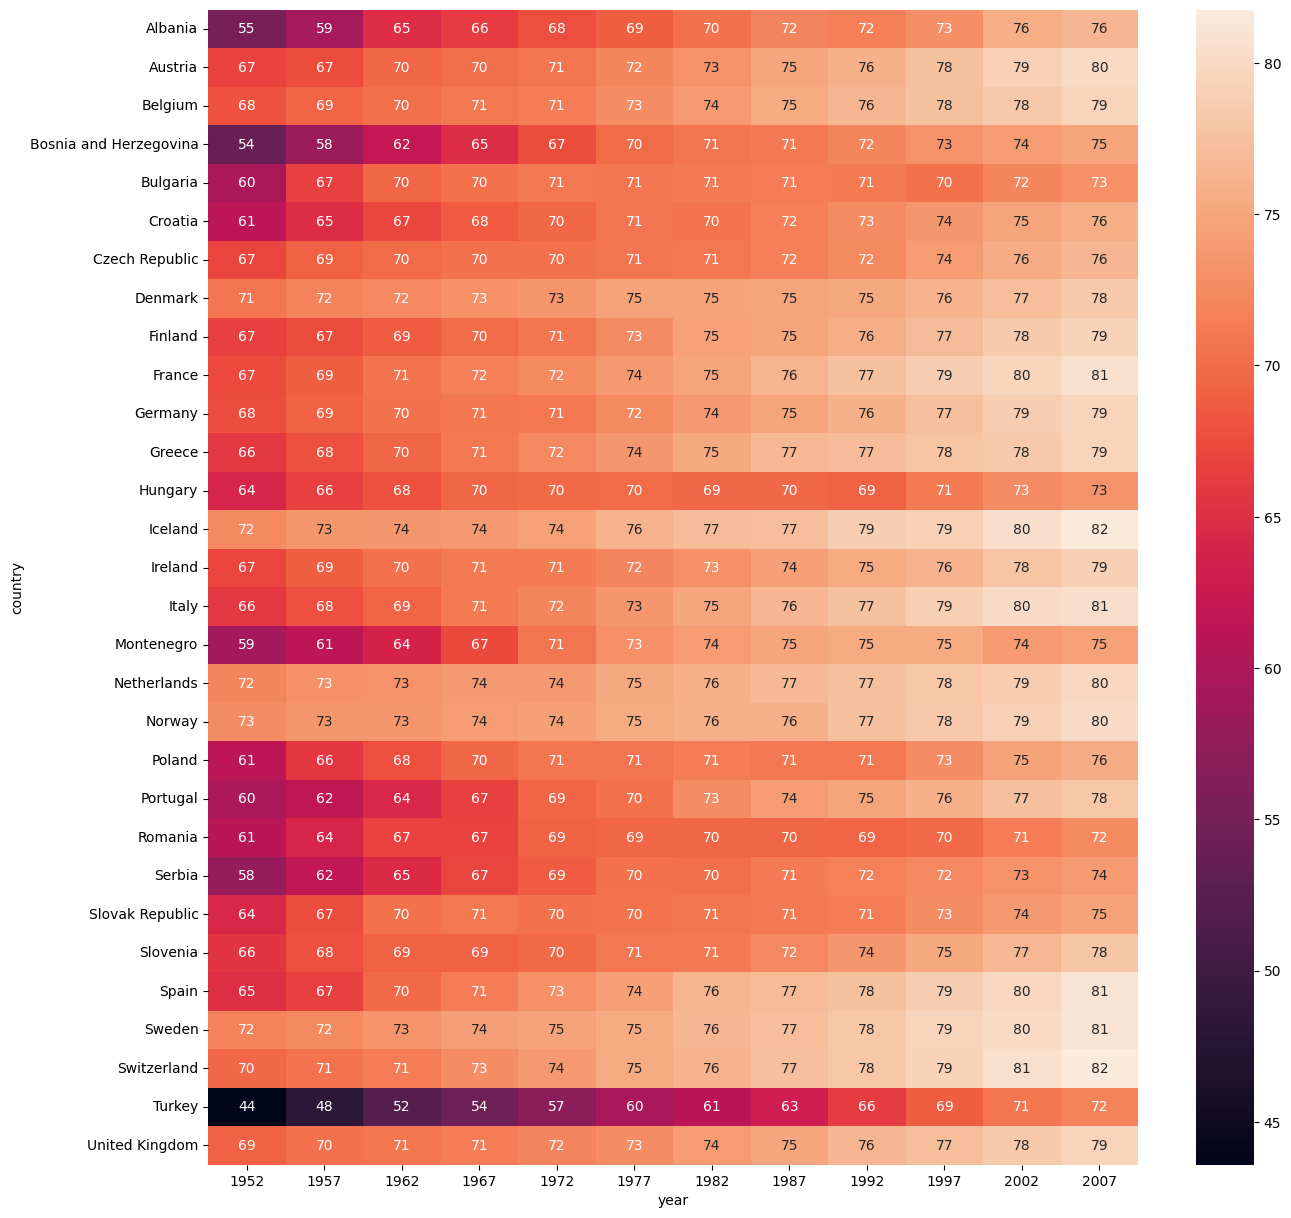

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(Europe_df, annot=True) # axes level function 

<span style="font-size: 18px;"> <b>Question: Add the linewidths and linecolor in the above heatmap so, it's better

<Axes: xlabel='year', ylabel='country'>

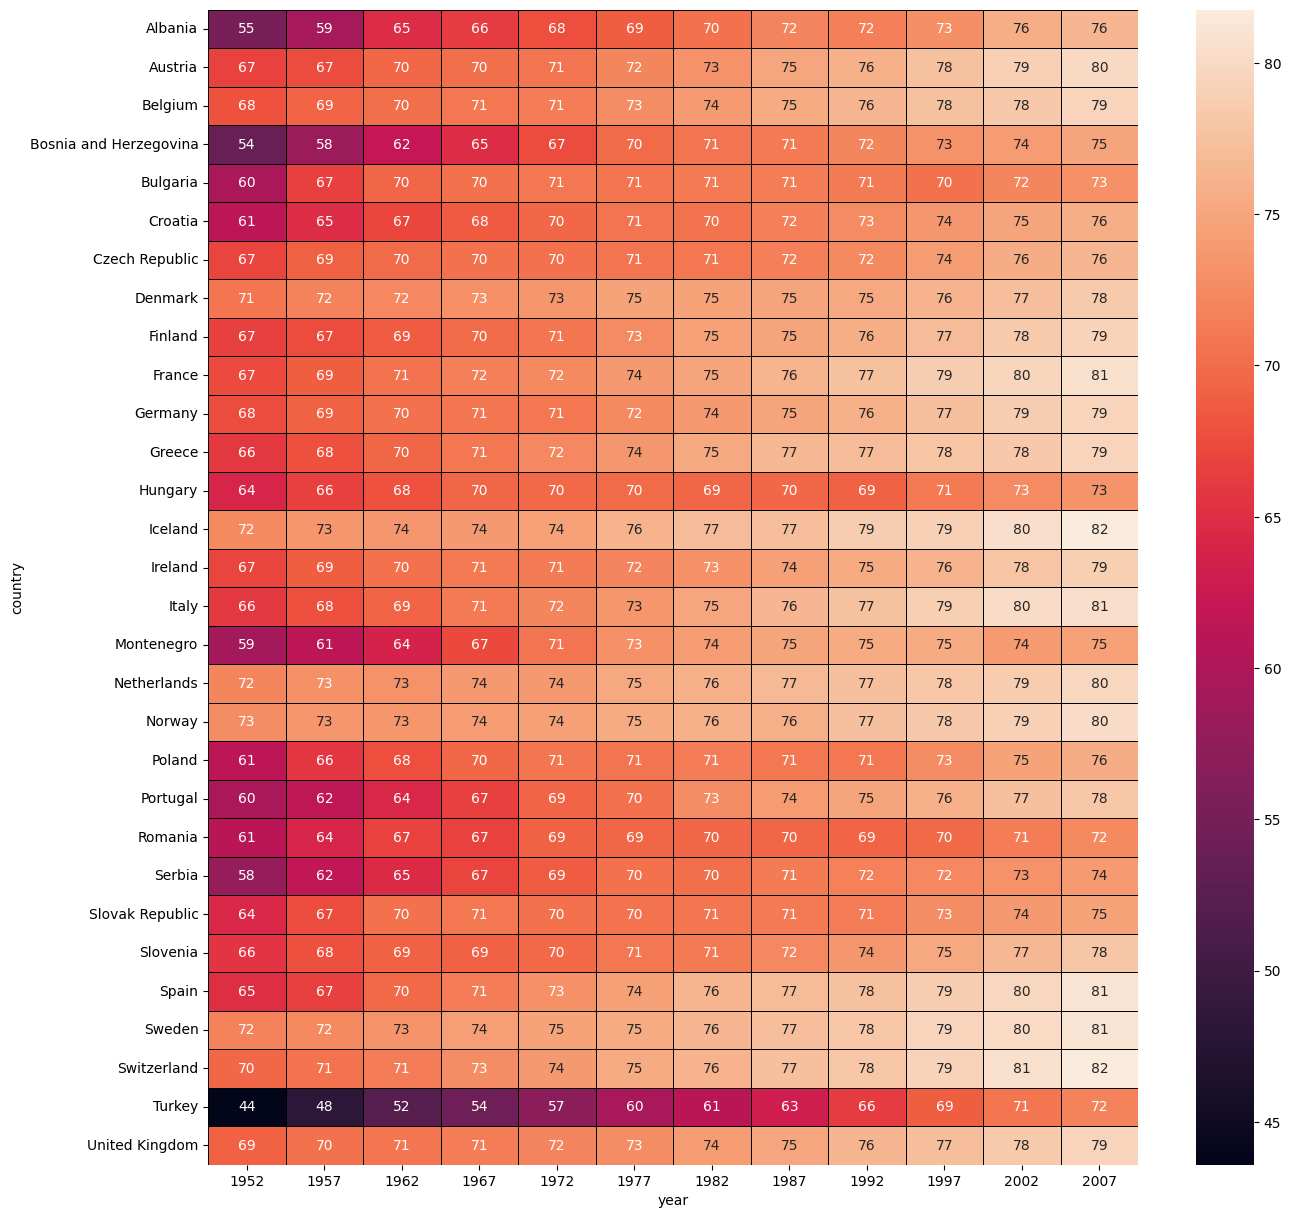

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(Europe_df, annot=True, linewidths=0.5, linecolor= 'black') 

<span style="font-size: 18px;"> <b>Question: Change the color of the above heatmap so it looks pretty

<Axes: xlabel='year', ylabel='country'>

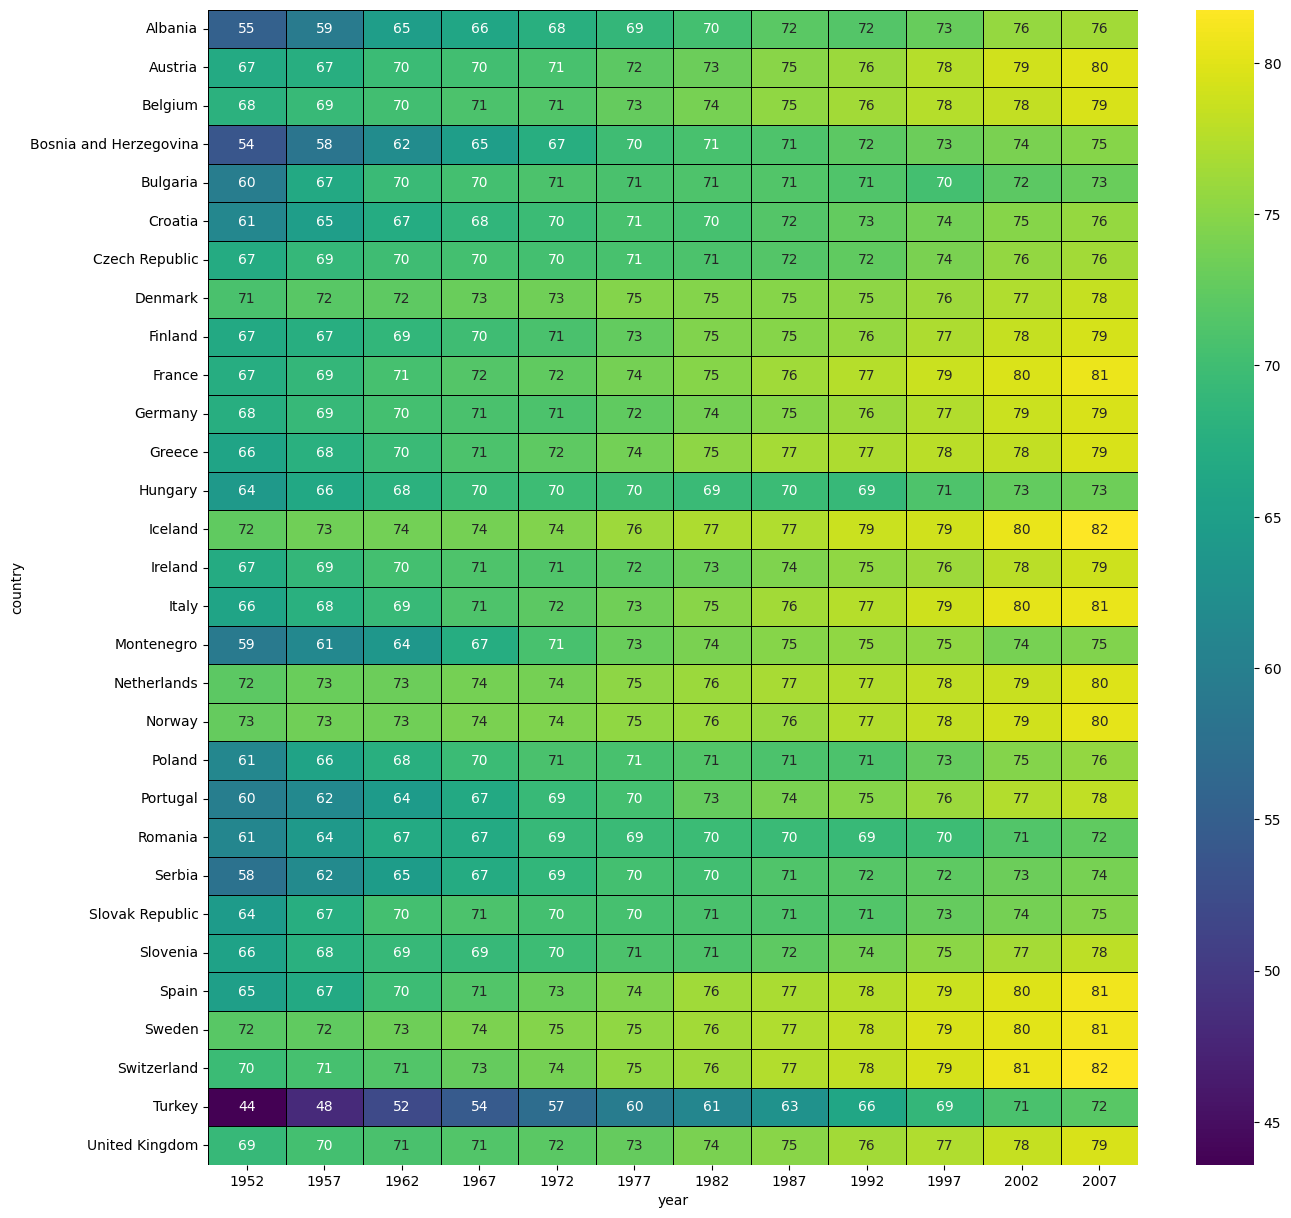

In [ ]:
plt.figure(figsize=(15,15))  
sns.heatmap(Europe_df, annot=True, linewidths=0.5, linecolor= 'black', cmap='viridis') # can you any like summer, autumn 

## <center> <b> ii) Clustermap </center> </b>

- Plot a matrix dataset as a hierarchically-clustered heatmap.
- This function requires scipy to be available.

> Similiary columns ko saath me kr deta hai aur disimilar ko alag

In [ ]:
iris = px.data.iris()

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


<span style="font-size: 18px;"> <b>Question: We want to figure out the similar columns and the similar flowers from the 150 flowers.

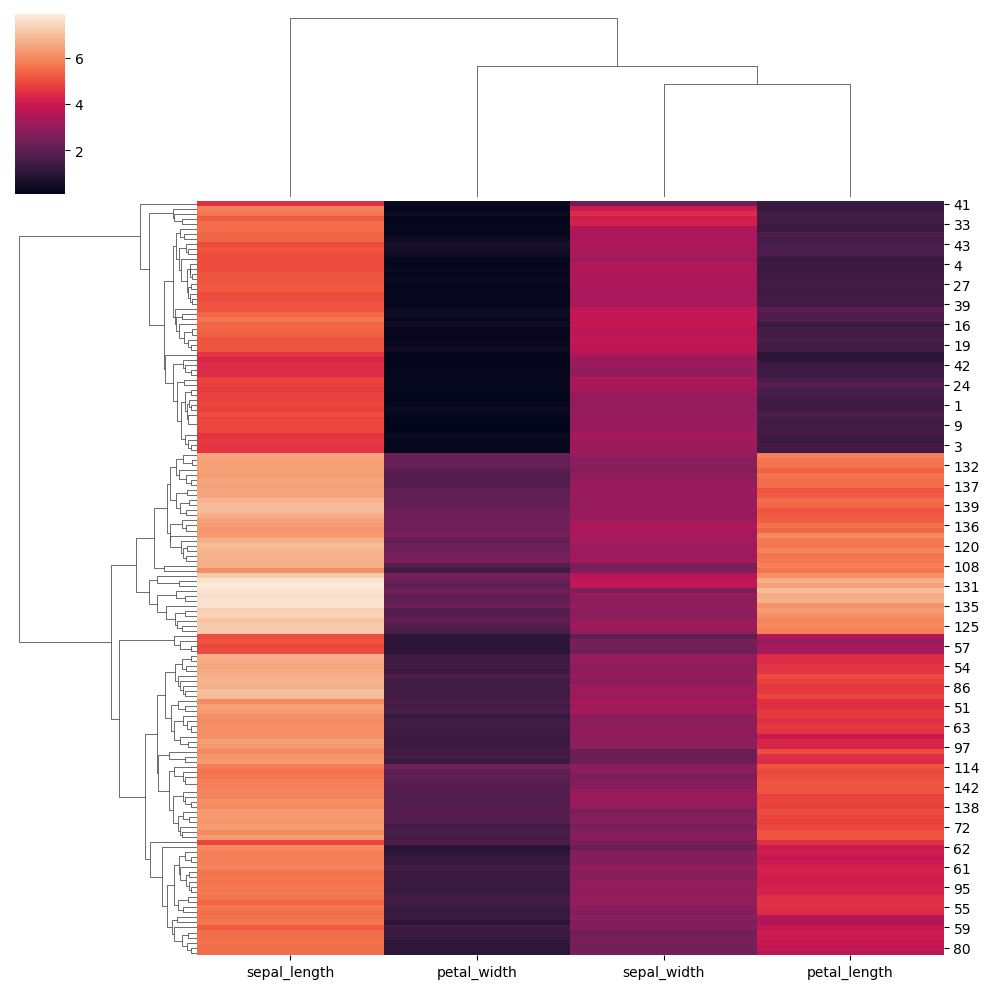

In [ ]:
sns.clustermap(iris.iloc[:,0:4]) # below you can the see the dendograms above the plot

# according to the dataset most closest columns are sepal_width and petal_length then petal_width then in the last setal_length

> Clustermap interpretation: according to the dataset most closest columns are sepal_width and petal_length then petal_width then in the last setal_length<br>
> There clustering on the row as you can see the flower index on the right side of the plot

> Clustermap clustering is done by the machine learning algorithm called agglomerative (bottom-up) hierarchical clustering